In [1]:
from pycocotools.coco import COCO
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import skimage.io as io

paths = {}
paths["COCO"] = "/home/david/BlenderProc/BlenderProcBlock/output/coco_data"
paths["COCO_FILE"] = os.path.join(paths["COCO"],"coco_annotations.json")

In [2]:
coco = COCO(paths["COCO_FILE"])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
cats = coco.loadCats(coco.getCatIds())
max_id = np.array([cat["id"] for cat in cats]).max()
class_names = {}
for cat in cats:
    class_names[cat["id"]] = cat["name"]

    
# Setup the data pipeline
print(coco.getImgIds())
print(coco.getAnnIds(0))
print(coco.loadImgs(np.arange(0,2)))


# shuffle(img_ids)
# dataset = tf.data.Dataset.from_tensor_slices(img_ids)

[0, 1]
[1, 2]
[{'id': 0, 'file_name': 'images/000000.png', 'width': 640, 'height': 360, 'date_captured': '2022-10-25 07:29:43.704777', 'license': 1, 'coco_url': '', 'flickr_url': ''}, {'id': 1, 'file_name': 'images/000001.png', 'width': 640, 'height': 360, 'date_captured': '2022-10-25 07:29:43.725624', 'license': 1, 'coco_url': '', 'flickr_url': ''}]


[{'id': 1, 'image_id': 0, 'category_id': '1', 'iscrowd': 0, 'area': 692, 'bbox': [259, 82, 132, 200], 'segmentation': {'counts': [93374, 1, 357, 20, 339, 2, 14, 22, 321, 2, 32, 22, 302, 3, 50, 22, 284, 2, 69, 22, 266, 2, 87, 22, 248, 2, 105, 23, 228, 2, 124, 11, 222, 2, 135, 1, 221, 2, 136, 1, 220, 2, 137, 2, 217, 2, 140, 1, 216, 2, 141, 1, 215, 2, 142, 2, 213, 2, 144, 1, 211, 2, 146, 1, 210, 2, 147, 2, 208, 2, 149, 1, 206, 3, 150, 1, 205, 2, 152, 1, 204, 2, 153, 2, 202, 2, 155, 1, 200, 3, 156, 1, 199, 2, 158, 2, 197, 2, 160, 1, 196, 2, 161, 1, 194, 2, 163, 2, 192, 2, 165, 1, 191, 2, 166, 1, 190, 2, 167, 2, 187, 2, 169, 2, 186, 2, 171, 1, 185, 2, 172, 1, 184, 2, 173, 2, 181, 2, 176, 1, 180, 2, 177, 1, 179, 2, 178, 2, 176, 3, 180, 1, 175, 2, 182, 1, 174, 2, 183, 2, 172, 2, 184, 2, 172, 1, 186, 1, 172, 2, 185, 1, 173, 1, 185, 2, 172, 1, 186, 1, 172, 2, 185, 1, 173, 1, 185, 2, 172, 2, 185, 1, 173, 1, 185, 1, 173, 2, 184, 2, 173, 1, 185, 1, 173, 1, 185, 1, 173, 2, 184, 1, 174, 1, 184, 2, 1

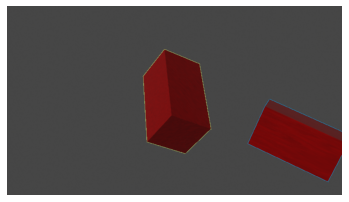

In [5]:
image_file_name = coco.loadImgs(0)[0]["file_name"]
ann = coco.loadAnns(coco.getAnnIds(coco.loadImgs(0)[0]["id"]))

print(ann)

# Example training image
training_image_file = os.path.join(paths['COCO'],image_file_name)

training_image = io.imread(training_image_file)
plt.imshow(training_image)
plt.axis('off')
coco.showAnns(ann)

mask = coco.annToMask(ann[0])
#plt.imshow(mask)